In [2]:

import numpy as np

# fake_data_file.npy
file_path = '/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_multi_19_seq1000_interval100_v34_with0values/ddpm_fake_inD_multi_19_seq1000_interval100_v34_with0values.npy'

# 使用numpy的load函数读取npy文件
fake_data_norm = np.load(file_path)

# 现在，变量data包含了npy文件中的数据
# 你可以打印数据来查看内容，或者进行其他操作
print(fake_data_norm[0])

[[0.23340252 0.45845601 0.68893108 ... 0.99815795 0.00225621 0.99829116]
 [0.23339558 0.45502323 0.68916813 ... 0.99816304 0.00223517 0.99834228]
 [0.23641536 0.45079863 0.68884251 ... 0.99814922 0.00222901 0.9983272 ]
 ...
 [0.00118074 0.99656287 0.00210136 ... 0.9980287  0.00175807 0.99844599]
 [0.001643   0.99590552 0.00210163 ... 0.99804199 0.00173613 0.99842584]
 [0.00282022 0.99437806 0.00159276 ... 0.99807915 0.00176042 0.99839628]]


In [2]:
print(fake_data_norm.shape)
print(fake_data_norm[0].shape)

(500, 1000, 68)
(1000, 68)


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("/DATA1/rzhou/ika/multi_testcases/inD/inD_map19_interval100_seq1000_nfea68.csv", header=0)
data = df.values
scaler = MinMaxScaler()
scaler = scaler.fit(data[:,1:])
interval=1000
num_feature=68
fake_data=scaler.inverse_transform(fake_data_norm.reshape(-1, num_feature)).reshape(-1, interval, num_feature)


In [4]:
print(fake_data)
print(fake_data.shape)

[[[ 2.17796878e+01 -2.87182240e+01  6.44012634e+01 ... -3.48294960e-02
    4.67759092e-02 -7.64886841e-02]
  [ 2.17790398e+01 -2.89002653e+01  6.44234226e+01 ... -3.47331371e-02
    4.63396981e-02 -7.42009203e-02]
  [ 2.20608271e+01 -2.91242969e+01  6.43929836e+01 ... -3.49946021e-02
    4.62118006e-02 -7.48759106e-02]
  ...
  [ 1.10179228e-01 -1.82272019e-01  1.96435255e-01 ... -3.72734042e-02
    3.64483351e-02 -6.95586938e-02]
  [ 1.53314845e-01 -2.17131458e-01  1.96460328e-01 ... -3.70220823e-02
    3.59935882e-02 -7.04604597e-02]
  [ 2.63165919e-01 -2.98132991e-01  1.48890735e-01 ... -3.63193953e-02
    3.64971463e-02 -7.17837610e-02]]

 [[ 7.45701299e+01 -1.46503109e+01  4.60637078e+01 ... -3.36140221e-02
    4.00127847e-02 -8.59358817e-02]
  [ 7.52938410e+01 -1.43883112e+01  4.68105239e+01 ... -3.28194843e-02
    3.86454547e-02 -8.65108241e-02]
  [ 7.51050577e+01 -1.43252095e+01  4.68672564e+01 ... -3.37171430e-02
    3.89142249e-02 -8.65788567e-02]
  ...
  [ 0.00000000e+00 -1.0

In [5]:
# 将所有绝对值小于10的元素替换为0
fake_data[np.abs(fake_data) < 10] = 0

# 验证替换结果
fake_data[:1]  # 展示处理后的第一个样本以减少输出量

array([[[ 21.77968778, -28.71822403,  64.40126337, ...,   0.        ,
           0.        ,   0.        ],
        [ 21.77903981, -28.9002653 ,  64.42342258, ...,   0.        ,
           0.        ,   0.        ],
        [ 22.0608271 , -29.1242969 ,  64.39298361, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]])

In [6]:
#optional,有需求的话可以打出来看一眼
df_single = pd.DataFrame(fake_data[0])
df_single.to_csv("check_faka_data.csv", index=False)


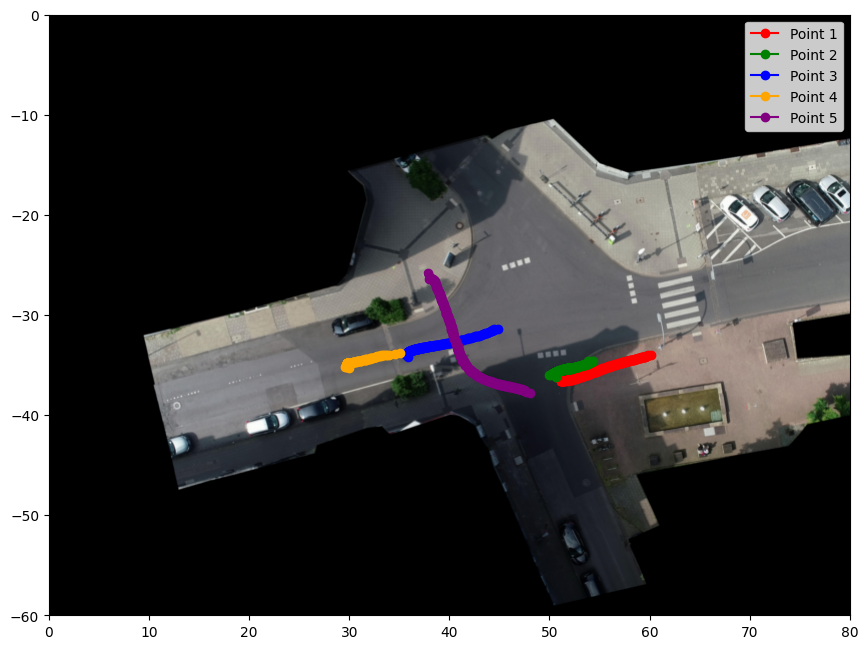

In [21]:
#画轨迹的静态图
import numpy as np
import matplotlib.pyplot as plt


# 载入背景图片，此处使用一个假设的路径，你需要替换为实际的文件路径
bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'  # 假设的背景图路径

# 创建图形和轴
fig, ax = plt.subplots(figsize=(11.7, 7.8))

# 设置坐标轴的范围
ax.set_xlim(0, 80)
ax.set_ylim(-60, 0)

# 绘制背景图：这需要一个真实的背景图文件
# 使用extent来匹配背景图的实际坐标位置
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, 117, -78, 0])

# 绘制轨迹
# x = selected_data[:, 1]
# y = selected_data[:, 2]
# ax.plot(x, y, marker='o', color='red')  # 使用红色标记点的轨迹


colors = ['red', 'green', 'blue', 'orange', 'purple']  # 为每个轨迹指定颜色
for i in range(5):
    # 提取每个点的x和y坐标
    x = fake_data[555][:, + i*2]
    y = fake_data[555][:, 1 + i*2]
    # 绘制轨迹
    ax.plot(x, y, marker='o', linestyle='-', color=colors[i], label=f'Point {i+1}')

# 添加图例
ax.legend()

plt.show()


555


/tmp/ipykernel_453273/1881559705.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


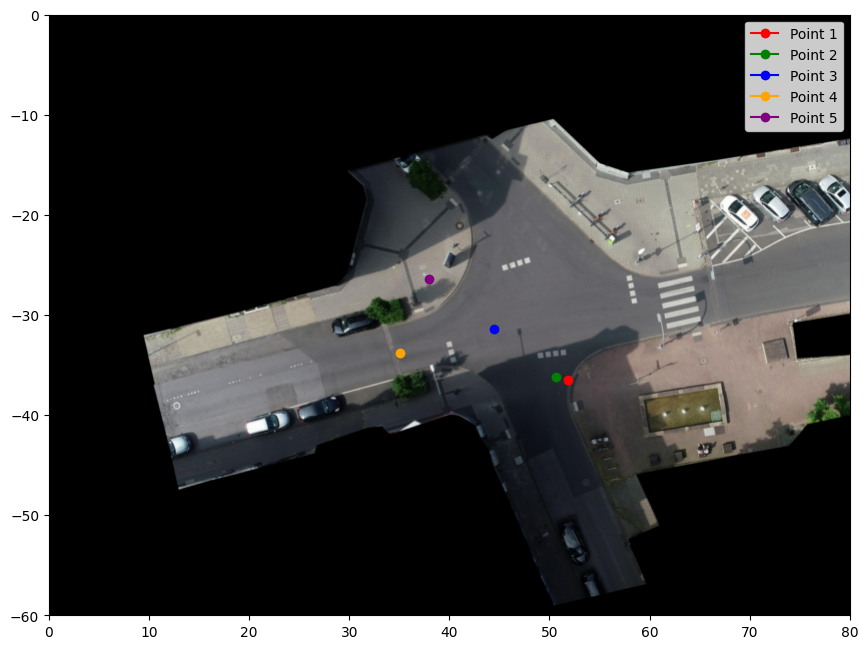

In [22]:
#动画 5个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random

# 假设 fake_data 是一个形状为 (2001, 100, 10) 的数组
# 这里你需要加载你的真实数据
# fake_data = ...

# 随机选择一个元素而不是固定的 330
random_index = random.randint(0, fake_data.shape[0] - 1)
#random_index=111
print(random_index)

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
fig, ax = plt.subplots(figsize=(11.7, 7.8))
ax.set_xlim(0, 80)
ax.set_ylim(-60, 0)
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, 117, -78, 0])

colors = ['red', 'green', 'blue', 'orange', 'purple']
lines = [ax.plot([], [], marker='o', linestyle='-', color=colors[i], label=f'Point {i+1}')[0] for i in range(5)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j, line in enumerate(lines):
        x = fake_data[random_index][i, j*2]
        y = fake_data[random_index][i, j*2+1]
        line.set_data(x, y)
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=250, interval=40, blit=True)

plt.legend()

# 保存动画为MP4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_multi_18-29_interval250/samples/19map/{random_index}.mp4', writer=writer)


In [8]:
#动画, 多个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random

# 假设 fake_data 是一个形状为 (num_cases, 1500, 60) 的数组
# 生成1个case
# random_index = random.randint(0, fake_data.shape[0] - 1)
# #random_index = 111
# print(f"Random index: {random_index}")

# 生成多个case
num_cases=5
random_indices = np.random.choice(fake_data.shape[0], num_cases, replace=False)
print(f"Random indices: {random_indices}")

num_v=34

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
bg_img = plt.imread(bg_image_path)

#设置num_v个颜色
colors = plt.cm.jet(np.linspace(0, 1, num_v))

for random_index in random_indices:
    fig, ax = plt.subplots(figsize=(11.7, 7.8))
    ax.set_xlim(0, 80)
    ax.set_ylim(-60, 0)
    ax.imshow(bg_img, extent=[0, 117, -78, 0])

    lines = [ax.plot([], [], marker='o', linestyle='', color=colors[i])[0] for i in range(num_v)]

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def animate(i):
        for j, line in enumerate(lines):
            x = fake_data[random_index][i, j*2]
            y = fake_data[random_index][i, j*2+1]
            # 如果x或y为0，则不显示该点
            if x == 0 and y == 0:
                line.set_data([], [])
            else:
                line.set_data(x, y)
            print(j)
        return lines

    anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=40, blit=True)

    #plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper right', fontsize='small')
    # 在每个动画循环的末尾，但在保存动画之前，添加图例
    plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


    # 保存动画为MP4
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
    anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_multi_19_seq1000_interval100_v34_with0values/animation/{random_index}.mp4', writer=writer)
    plt.close(fig)  # 关闭当前绘图窗口，防止过多图形打开

Random indices: [107 448 258 482 331]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


/tmp/ipykernel_505387/3242231033.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/tmp/ipykernel_505387/3242231033.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/tmp/ipykernel_505387/3242231033.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/tmp/ipykernel_505387/3242231033.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/tmp/ipykernel_505387/3242231033.py:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
